<a href="https://colab.research.google.com/github/a01137646/MNA_Public/blob/main/Inteligencia%20artificial%20y%20aprendizaje%20autom%C3%A1tico/MNA_IAyAA_semana_6_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Gerardo Aaron Castañeda Jaramillo - A01137646
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [76]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

#**Ejercicio-1.** 

1.   Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.  



Convertimos la base de datos a una dataframe

In [43]:
df = pd.read_csv('https://github.com/a01137646/MNA_Public/blob/main/Inteligencia%20artificial%20y%20aprendizaje%20autom%C3%A1tico/SouthGermanCredit.asc?raw=true',delimiter =" ")

Cambimos los nombres de las columnas a nombres en ingles

In [44]:
df.rename(columns = {'laufkont':'status', 'laufzeit':'duration', 'moral':'credit_history', 'verw':'purpose', 'hoehe':'amount', 'sparkont':'savings', 'beszeit':'employment_duration', 
                     'rate':'installment_rate', 'famges':'personal_status_sex', 'buerge':'other_debtors', 'wohnzeit':'present_residence', 'verm':'property', 'alter':'age', 
                     'weitkred':'other_installment_plans', 'wohn':'housing', 'bishkred':'number_credits', 'beruf':'job', 'pers':'people_liable', 'telef':'telephone', 'gastarb':'foreign_worker',
                     'kredit':'credit_risk'}, inplace = True)
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


Vemos que no existan valores nulos o de tipo object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

#**Ejercicio-2.**

2. Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las 
variables de entrada y a la variable Y como la variable de salida.

Separamos los valores X de los valores Y

In [46]:
Y = df['credit_risk']
X = df.drop('credit_risk',axis=1)

Hacemos una particion de los valores, 85% para entrenamiento, y 15% para pruebas

In [15]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, train_size=0.85, test_size=0.15, random_state=1)  
print(Xtv.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada de prueba')  
print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada de entrenamiento y validación
(150, 20) : dimensión de datos de entrada de prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

3. Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de  cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal  (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha  información realiza un Pipeline que incluya al menos las siguientes transformaciones:


* Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).

* Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable. 

* Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique  la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar. 

Creamos listas con los nombres de las columnas dependiendo de su tipo de datos

In [47]:
#valores numericos
num_nombres = ['duration','amount','age']
#valores categoricos
cat_nombres = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
#valores ordinales
ord_nombres = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#valores binarios
bin_nombres = ['people_liable','telephone','foreign_worker']

Observamos si existen valores nulos que necesiten imputacion

In [48]:
df.isnull().values.any()

False

Aunque no existen valores nulos, por fines del ejercicio, los trabajaremos como si existieran.

Utilizamos el metodo de imputar por la mediana en los valores numericos, asi como el metodo de imputar la moda para los valores categoricos.

`**PENDIENTE EXPLICAR POR QUE SE USA MEDIANA, MODA, Y ONE-HOT ENCODER PARA VALORES BINARIOS**`

De igual manera, para los valores numericos, se utiliza el metodo de MinMaxScaler para transformarlos a un rango entre 0 y 1. Mientras que para los valores categoricos y binarios se utiliza one-hot encoder, lo cual los transforma en los categoricos a variables dummies con valores de 0 y 1, y las binarias de igual manera, a valores de 0 y 1. 

In [49]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler())]) 
num_pipeline_nombres = num_nombres

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = cat_nombres

# Transformaciones one-hot-encoder en algunas de las categóricas:
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder())])
catOHE_pipeline_nombres = cat_nombres + bin_nombres

# Conjuntamos las transformaciones que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#**Ejercicio-4.**

4. Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características: 

* Usa los parámetros predeterminados de cada modelo.

In [67]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  #el parametro default de solver es lbfgs, pero llega al numero maximo de iteraciones
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RF - Bosque Aleatorio:
  modelos.append(RandomForestClassifier())
  nombres.append('RF')

  return modelos, nombres

* En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas).

In [60]:
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel() 
  return (tp + tn)/(tp + tn + fp + fn)

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel() 
  return tp/(tp+fp)

def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel() 
  return tp/(tp+fn)

def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel() 
  return tp/(tp + (1/2)*(fp + fn))

def mi_gmean(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  specificity = tn/(tn+fp)
  return np.sqrt(recall*specificity)

* Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 
* Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta. 

In [68]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  mismetricas = {'accuracy':make_scorer(mi_accuracy), 'precision':make_scorer(mi_precision), 'recall':make_scorer(mi_recall), 'f1score':make_scorer(mi_f1score), 'gmean':make_scorer(mi_gmean)}

  resultadosOU = cross_validate(pipeline, Xtv, ytv, scoring=mismetricas, cv=cv)
  resultados.append(resultadosOU)

  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']),
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),
                                                                          np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']),
                                                                          ))

LR:
mean Accuracy: 0.759 (0.0268)
mean Precision: 0.800 (0.0222)
mean Recall: 0.873 (0.0292)
mean f1score: 0.835 (0.0186)
Gmean: 0.657 (0.0466)

DT:
mean Accuracy: 0.693 (0.0309)
mean Precision: 0.787 (0.0239)
mean Recall: 0.767 (0.0423)
mean f1score: 0.776 (0.0256)
Gmean: 0.630 (0.0432)

RF:
mean Accuracy: 0.755 (0.0249)
mean Precision: 0.793 (0.0189)
mean Recall: 0.878 (0.0314)
mean f1score: 0.833 (0.0179)
Gmean: 0.643 (0.0431)



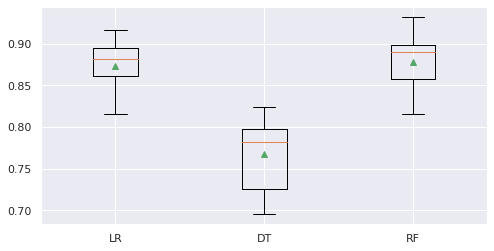

In [69]:
sns.set(rc={'figure.figsize':(8,4)})

bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bprecall.append(rr)

plt.boxplot(bprecall, labels=nombres, showmeans=True)

plt.show()

**PENDIENTE EXPLICAR SI ALGUN MODELO ESTA SUBENTRENADO O SOBREENTRANDO**

* En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 

I. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”.  

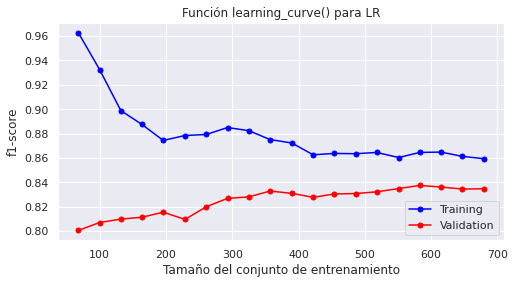

In [81]:
#obtenemos el modelo y los parametros de cross validation
modeloLC = modelos[0]
cvLC = cv
#definimos los al menos 20 puntos de particion
delta_train_sz = np.linspace(0.1, 1.0, 20)

#obtenemos los datos de X transformados
Xx = columnasTransformer.fit_transform(Xtv)

#obtenemos la learning curve
train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC, 
                                                        X=Xx, 
                                                        y=np.ravel(ytv),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring=make_scorer(mi_f1score))

# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve() para ' + str(nombres[0]))
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('f1-score')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

**PENDIENTE COMENTARIOS DEL MODELO**

II. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.    

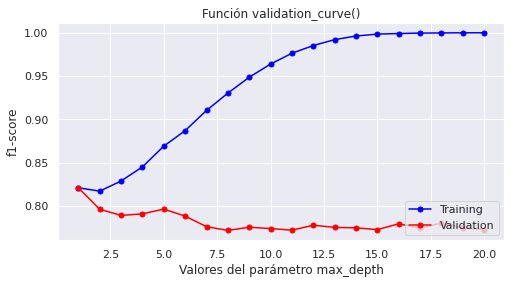

In [80]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = modelos[1]
cvVC = cv

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xx, 
                                              np.ravel(ytv), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring=make_scorer(mi_f1score))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para ' + str(nombres[1]))
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('f1-score')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

**PENDIENTE COMENTARIOS DEL MODELO**

III. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.

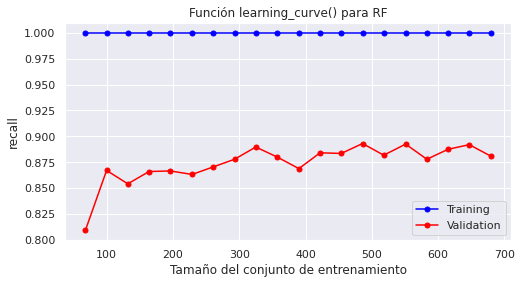

In [82]:
#obtenemos el modelo y los parametros de cross validation
modeloLC = modelos[2]
cvLC = cv
#definimos los al menos 20 puntos de particion
delta_train_sz = np.linspace(0.1, 1.0, 20)

#obtenemos la learning curve
train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC, 
                                                        X=Xx, 
                                                        y=np.ravel(ytv),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring=make_scorer(mi_recall))

# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve() para ' + str(nombres[2]))
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('recall')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

**PENDIENTE COMENTARIOS DEL MODELO**

#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**